In [28]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor


# Barra de progreso de un proceso
# ------------------------------------------------------------------------------
from tqdm import tqdm

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('once')

In [29]:
df = pd.read_csv("../datos/supermarket.csv", index_col = 0)
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [30]:
df_regresion = df[['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Total']]

In [31]:
df_regresion = pd.get_dummies(df_regresion)

In [32]:
X = df_regresion.drop('Total', axis=1)
y = df_regresion["Total"]

In [33]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
arbol = DecisionTreeRegressor(random_state =0)
arbol.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [35]:
param = {"max_depth": [2,4, 6], # teniendo en cuenta que teníamos overfitting tendremos que reducir la profundidad del modelo, la nuestra anterior era de 17. Bajaremos mucho este valor ya que teníamos un overfitting muy claro
        "max_features": [1,2,3,4],# calculamos en celdas anteriores, probaremos a hacer el modelo como una variable, 2, 3 y 4. Ponemos como límite el 4 ya que es el resultado de la raiz cuadrada. 
        # estos dos hiperparámetros son más difíciles de definir, pero usualmente se suelen elegir los siguientes valores
        "min_samples_split": [10, 50, 100],
        "min_samples_leaf": [10,50,100]} 

In [36]:
max_features = np.sqrt(len(x_train.columns))
max_features

5.0

In [37]:
print(arbol.tree_.max_depth)

13


In [38]:
y_pred_test_dt = arbol.predict(x_test)
y_pred_train_dt = arbol.predict(x_train)

In [39]:
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    
    
    resultados = {'MAE': [mean_absolute_error(y_test, y_test_pred), mean_absolute_error(y_train, y_train_pred)],
                'MSE': [mean_squared_error(y_test, y_test_pred), mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(mean_squared_error(y_test, y_test_pred)), np.sqrt(mean_squared_error(y_train, y_train_pred))],
                'R2':  [r2_score(y_test, y_test_pred), r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df

In [40]:
dt_results1 = metricas(y_test, y_train, y_pred_test_dt, y_pred_train_dt, "Decission Tree I")
dt_results1

,MAE,MSE,RMSE,R2,set,modelo
0,1.367153,5.772415,2.402585,0.999911,test,Decission Tree I
1,0.000000,0.000000,0.000000,1.000000,train,Decission Tree I


In [53]:
param = {"max_depth": [11,12,13], # teniendo en cuenta que teníamos overfitting tendremos que reducir la profundidad del modelo, la nuestra anterior era de 17. Bajaremos mucho este valor ya que teníamos un overfitting muy claro
        "max_features":[4,5,6],# calculamos en celdas anteriores, probaremos a hacer el modelo como una variable, 2, 3 y 4. Ponemos como límite el 4 ya que es el resultado de la raiz cuadrada. 
        # estos dos hiperparámetros son más difíciles de definir, pero usualmente se suelen elegir los siguientes valores
        "min_samples_split": [10, 15, 20],
        "min_samples_leaf": [10,15,20]} 

In [54]:
gs = GridSearchCV(
            estimator=DecisionTreeRegressor(), # tipo de modelo que queremos hacer
            param_grid= param, # que hiperparámetros queremos que testee
            cv=10, # crossvalidation que aprendimos en la lección de regresión lineal intro. 
            verbose=-1, # para que no nos printee ningún mensaje en pantalla
            return_train_score = True, # para que nos devuelva el valor de las métricas de set de datos de entrenamiento
            scoring="neg_mean_squared_error") # la métrica que queremos que nos devuelva

In [55]:
gs.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [11, 12, 13], 'max_features': [4, 5, 6],
                         'min_samples_leaf': [10, 15, 20],
                         'min_samples_split': [10, 15, 20]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=-1)

In [56]:
mejor_modelo = gs.best_estimator_
mejor_modelo

DecisionTreeRegressor(max_depth=11, max_features=6, min_samples_leaf=10,
                      min_samples_split=20)

In [57]:
y_pred_test_dt2 = mejor_modelo.predict(x_test)
y_pred_train_dt2 = mejor_modelo.predict(x_train)

In [58]:
dt_results2 = metricas(y_test, y_train, y_pred_test_dt2, y_pred_train_dt2, "Decision tree II")
dt_results2

,MAE,MSE,RMSE,R2,set,modelo
0,27.546157,1509.412558,38.851159,0.976799,test,Decision tree II
1,22.302402,1039.096798,32.235024,0.982437,train,Decision tree II


In [59]:
# vamos a crearnos un dataframe 
importancia_predictores = pd.DataFrame(
                            {'predictor': x_train.columns,
                             'importancia': mejor_modelo.feature_importances_}
                            )


# ordenamos de mayor a menor los resultados
importancia_predictores.sort_values(by=["importancia"], ascending=False, inplace = True)

# printeamos los resultados
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
1,Quantity,0.405725
5,gross income,0.384432
3,cogs,0.125789
2,Tax 5%,0.057909
0,Unit price,0.024424
24,Payment_Ewallet,0.000386
20,Product line_Home and lifestyle,0.000338
15,Gender_Male,0.000263
21,Product line_Sports and travel,0.000230
19,Product line_Health and beauty,0.000163


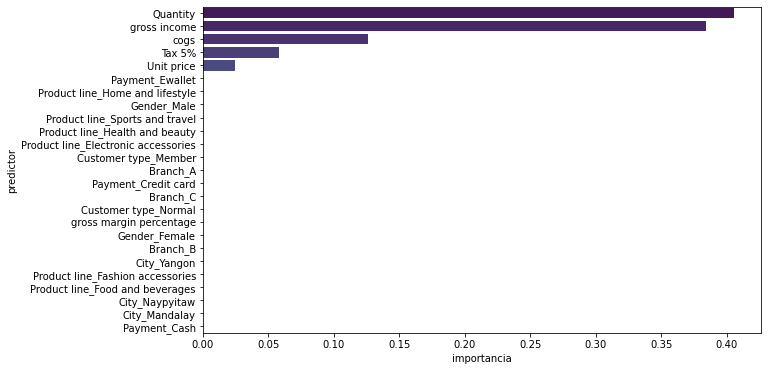

In [60]:
plt.figure(figsize=(10,6))
sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores, palette="viridis");
plt.show()

In [61]:
gs_rf = GridSearchCV(
            estimator=RandomForestRegressor(), # tipo de modelo que queremos hacer
            param_grid= param, # que hiperparámetros queremos que testee
            cv=10, # crossvalidation que aprendimos en la lección de regresión lineal intro. 
            verbose=-1, # para que no nos printee ningún mensaje en pantalla
            return_train_score = True, # para que nos devuelva el valor de las métricas de set de datos de entrenamiento
            scoring="neg_mean_squared_error") # la métrica que queremos que nos devuelva

In [62]:
gs_rf.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [11, 12, 13], 'max_features': [4, 5, 6],
                         'min_samples_leaf': [10, 15, 20],
                         'min_samples_split': [10, 15, 20]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=-1)

In [63]:
bosque = gs_rf.best_estimator_
bosque

RandomForestRegressor(max_depth=12, max_features=6, min_samples_leaf=10,
                      min_samples_split=10)

In [64]:
y_pred_test_rf2 = bosque.predict(x_test)
y_pred_train_rf2 = bosque.predict(x_train)

In [65]:
dt_results0 = metricas(y_test, y_train, y_pred_test_rf2, y_pred_train_rf2, "Random Forest")
dt_results0

,MAE,MSE,RMSE,R2,set,modelo
0,10.813951,277.020246,16.643925,0.995742,test,Random Forest
1,8.858380,307.228547,17.527936,0.994807,train,Random Forest


In [67]:
df["Total"].min()

10.6785

In [68]:
df["Total"].max()

1042.65

In [69]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,2.649463e+01,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431e+00,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,2.458853e+02,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,2.341765e+02,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,6.131498e-14,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580e+00,4.000000,5.500000,7.000000,8.500000,10.000000


In [66]:
importancia_predictores = pd.DataFrame(
                            {'predictor': x_train.columns,
                             'importancia': bosque.feature_importances_}
                            )


# ordenamos de mayor a menor los resultados
importancia_predictores.sort_values(by=["importancia"], ascending=False, inplace = True)

# printeamos los resultados
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
5,gross income,0.293869
2,Tax 5%,0.283495
3,cogs,0.273743
1,Quantity,0.092296
0,Unit price,0.049565
15,Gender_Male,0.000979
17,Product line_Fashion accessories,0.000722
23,Payment_Credit card,0.000544
20,Product line_Home and lifestyle,0.000507
8,Branch_C,0.000472


Basado en el alto rendimiento del algoritmo de regresión random forest en la predicción del total de cada factura se recomienda utilizar ese algoritmo en la previsión de ventas futuras. 
Esto puede ser útil en la toma de decisiones comerciales. 